In [88]:
import word2number
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

In [2]:
# Single Variable Linear Model

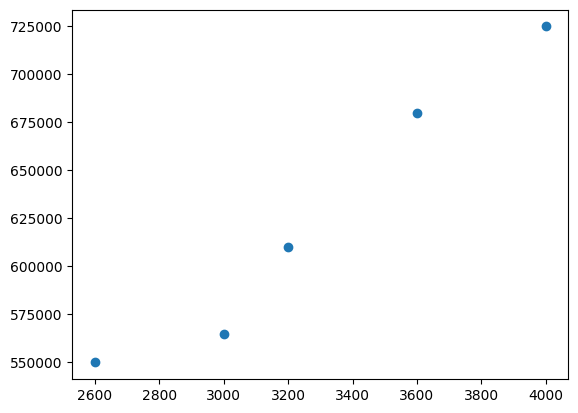

In [3]:
data = pd.read_csv("singleLinearModel.csv")

data.head()

plt.scatter(data.area, data.price)
plt.show()

In [4]:
reg = linear_model.LinearRegression()
reg.fit(data[['area']], data.price)

LinearRegression()

In [5]:
reg.predict([[3300]])

/home/ali/Desktop/TensorFlow/FoodApp/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
y = reg.coef_ * 3300 + reg.intercept_
print(y)

[628715.75342466]


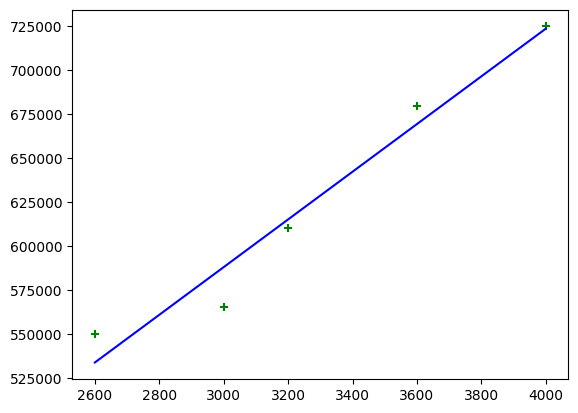

In [7]:
plt.scatter(data.area, data.price, color = 'green', marker = '+')
plt.plot(data.area, reg.predict(data[['area']]), color = 'blue')

In [8]:
df = pd.read_csv("singleLinearModelAreas.csv")
df.head(3)

,area
0,1000
1,1500
2,2300


In [9]:
p = reg.predict(df)
df['prices'] = p
df.to_csv("singleLinearModelPredictions.csv", index = False)

In [10]:
# Multi Variable Linear Model

In [11]:
df = pd.read_csv("MultiHomePrices.csv")
df.bedrooms = df.bedrooms.fillna(math.floor(df.bedrooms.median()))
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [13]:
reg.predict([[3000, 3, 40]])

/home/ali/Desktop/TensorFlow/FoodApp/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [14]:
reg.coef_[0] * 3000 + (reg.coef_[1] * 3) + (reg.coef_[2] * 40) + reg.intercept_

np.float64(498408.2515803067)

In [15]:
# Logistic Regression

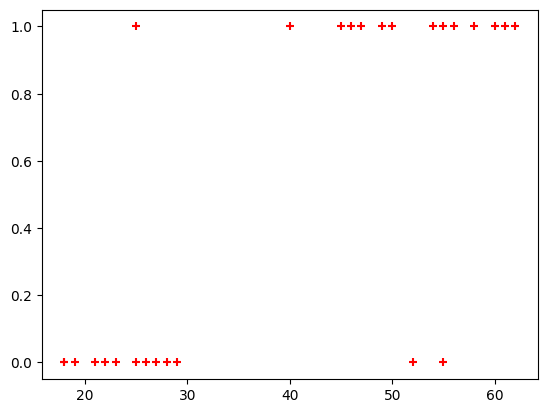

In [16]:
df = pd.read_csv("SingleLogisticInsurance.csv")
plt.scatter(df.age, df.bought_insurance, marker = '+', color = 'red')

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(df[['age']], df.bought_insurance, train_size = 0.9)
xTest

,age
8,62
12,27
0,22


In [18]:
model = linear_model.LogisticRegression()
model.fit(xTrain, yTrain)

LogisticRegression()

In [19]:
print(model.predict(xTest))
print(model.score(xTest, yTest)) # accurac

[1 0 0]
1.0


In [20]:
model.predict_proba(xTest)

array([[0.04751426, 0.95248574],
       [0.80293954, 0.19706046],
       [0.88429453, 0.11570547]])

In [21]:
from sklearn.datasets import load_digits

In [22]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [23]:
xTrain, xTest, yTrain, yTest = train_test_split(digits.data, digits.target, test_size = 0.1)
xTest

array([[ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.]])

In [24]:
model = linear_model.LogisticRegression()
model.fit(xTrain, yTrain)

/home/ali/Desktop/TensorFlow/FoodApp/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
model.score(xTest, yTest)

0.9666666666666667

<Figure size 640x480 with 0 Axes>

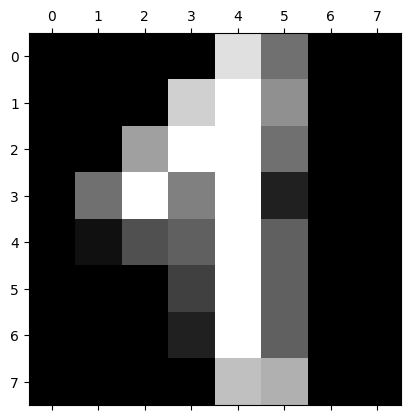

In [26]:
plt.gray()
plt.matshow(digits.images[70])

In [27]:
digits.target[70]

np.int64(1)

In [28]:
model.predict([digits.data[70]])

array([1])

In [29]:
yPredicted = model.predict(xTest)
cm = confusion_matrix(yTest, yPredicted)
cm

array([[23,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 20,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 19,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 13,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 17,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16]])

Text(95.72222222222221, 0.5, 'True')

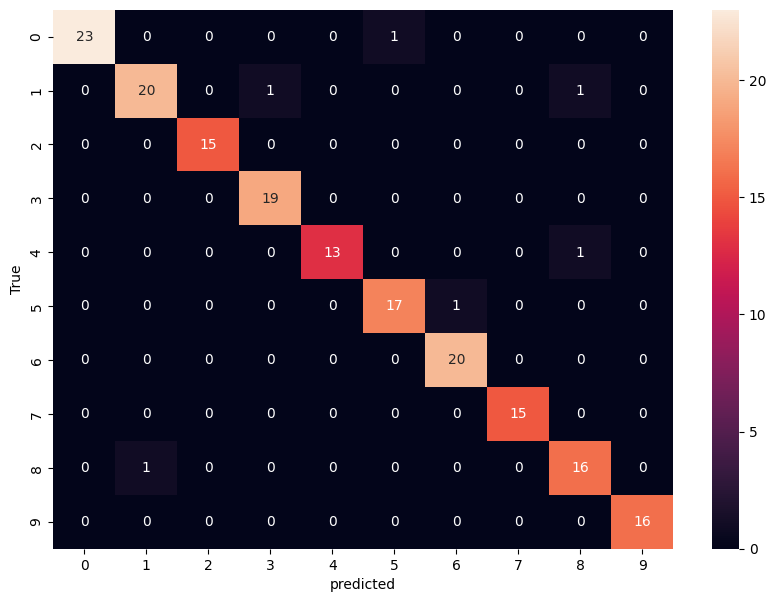

In [30]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('True')

In [31]:
# Decision Trees

In [32]:
df = pd.read_csv("DTsalaries.csv")
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [33]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [34]:
inputs['Company'] = le_company.fit_transform(inputs['company'])
inputs['Jobs'] = le_job.fit_transform(inputs['job'])
inputs['Degree'] = le_degree.fit_transform(inputs['degree'])

inputsN = inputs.drop(['company', 'job', 'degree'], axis = 'columns')

inputsN.head(5)

,Company,Jobs,Degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [35]:
xTrain, xTest, yTrain, yTest = train_test_split(inputsN, target, test_size = 0.1)

model = tree.DecisionTreeClassifier()

model.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [36]:
model.score(xTest, yTest)

1.0

In [37]:
model.predict([[2, 2, 1]])

/home/ali/Desktop/TensorFlow/FoodApp/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [38]:
#SVM

In [39]:
from sklearn.datasets import load_iris
rs = load_iris()

In [40]:
dir(rs)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [41]:
df = pd.DataFrame(rs.data, columns = rs.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
df['target'] = rs.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
df['flower_name'] = df.target.apply(lambda x: rs.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


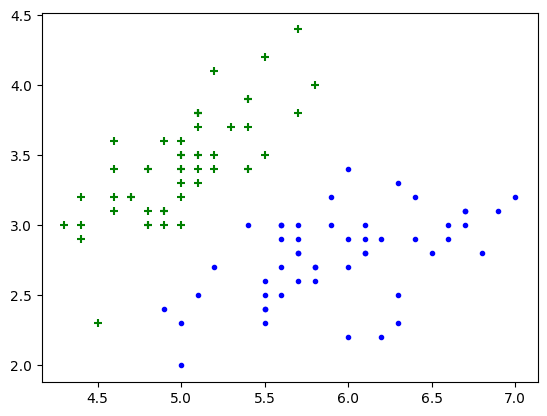

In [44]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'red', marker = '_')

plt.show()

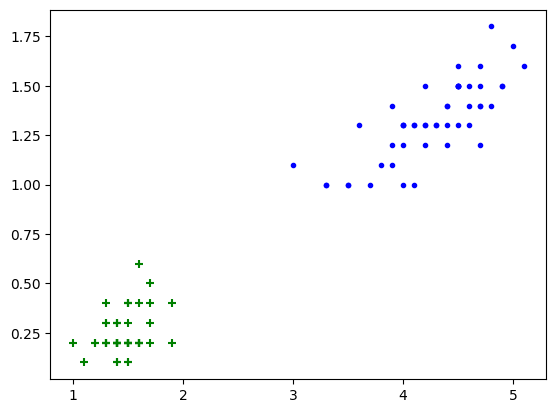

In [45]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'red', marker = '_')

plt.show()

In [46]:
newInput = df.drop(['target', 'flower_name'], axis = 'columns')
xTrain, xTest, yTrain, yTest = train_test_split(newInput, rs.target, test_size = 0.1)

In [47]:
model = SVC(C=1)
model.fit(xTrain, yTrain)

SVC(C=1)

In [48]:
model.score(xTest, yTest)

0.9333333333333333

In [49]:
model.predict([[54.2, 3.5, 1.4, 0.2]])

/home/ali/Desktop/TensorFlow/FoodApp/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [50]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [51]:
df = pd.DataFrame(digits.data)

In [52]:
xTrain, xTest, yTrain, yTest = train_test_split(df, digits.target, test_size = 0.1)
model = RandomForestClassifier()

In [53]:
model.fit(xTrain, yTrain)

RandomForestClassifier()

In [54]:
model.score(xTest, yTest)

0.9777777777777777

In [55]:
yPredicted = model.predict(xTest)
cm = confusion_matrix(yTest, yPredicted)
cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 22]])

<Axes: >

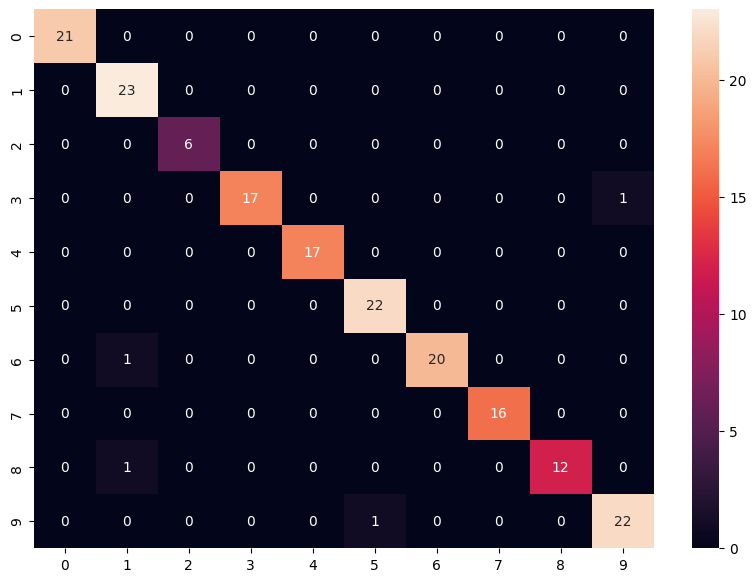

In [56]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)

In [57]:
kf = KFold(n_splits = 3)

In [58]:
def getScore(model, xTrain, xTest, yTrain, yTest):
    model.fit(xTrain, yTrain)
    return model.score(xTest, yTest)

In [59]:
scoresLR = []
scoresSCV = []
scoresRF = []

for trainIndex, testIndex in kf.split(digits.data):
    xTrain, xTest, yTrain, yTest = digits.data[trainIndex], digits.data[testIndex], digits.target[trainIndex], digits.target[testIndex]
    scoresLR.append(getScore(linear_model.LogisticRegression(max_iter=1000), xTrain, xTest, yTrain, yTest))
    scoresSCV.append(getScore(SVC(), xTrain, xTest, yTrain, yTest))
    scoresRF.append(getScore(RandomForestClassifier(n_estimators=40), xTrain, xTest, yTrain, yTest))

In [60]:
scoresLR

[0.9248747913188647, 0.9432387312186978, 0.9148580968280468]

In [61]:
scoresRF

[0.9348914858096828, 0.9499165275459098, 0.9165275459098498]

In [62]:
cross_val_score(linear_model.LogisticRegression(max_iter=1000), digits.data, digits.target)

array([0.92222222, 0.87222222, 0.94150418, 0.94150418, 0.89693593])

In [63]:
cross_val_score(SVC(C=10), digits.data, digits.target)

array([0.98055556, 0.95833333, 0.98328691, 0.98885794, 0.95821727])

In [64]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target)

array([0.91944444, 0.93333333, 0.95821727, 0.96100279, 0.91922006])

In [65]:
np.median(cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target))

np.float64(0.925)

In [66]:
rs = load_iris()
dir(rs)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [67]:
rs.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
df = pd.read_csv("K-MeansIncomes.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


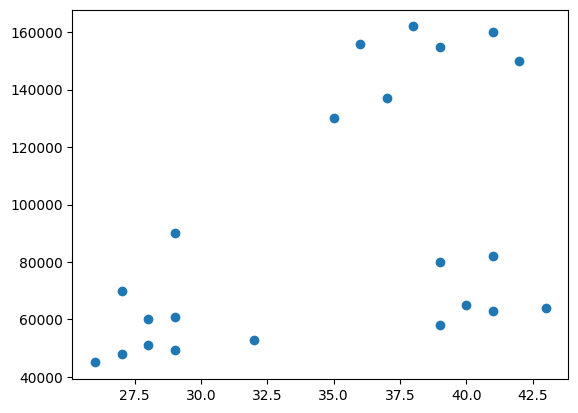

In [69]:
plt.scatter(df.Age, df['Income($)'])
plt.show()

In [70]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [71]:
yPredicted = km.fit_predict(df.drop(['Name'], axis='columns'))
yPredicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [72]:
df['cluster'] = yPredicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


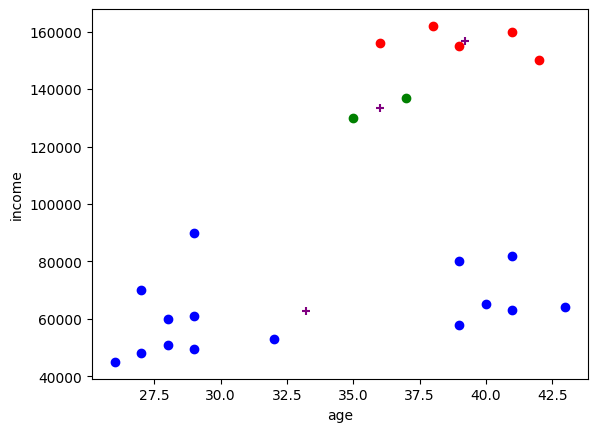

In [73]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
plt.scatter(df0.Age, df0['Income($)'], color = 'green')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='+', label='centroid')
plt.xlabel('age')
plt.ylabel('income')
plt.show()

In [74]:
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df

df.Age = scaler.fit_transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,0


In [75]:
km = KMeans(n_clusters=3)
yPredicted = km.fit_predict(df.drop(['cluster', 'Name'], axis='columns'))
yPredicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [76]:
df['cluster'] = yPredicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


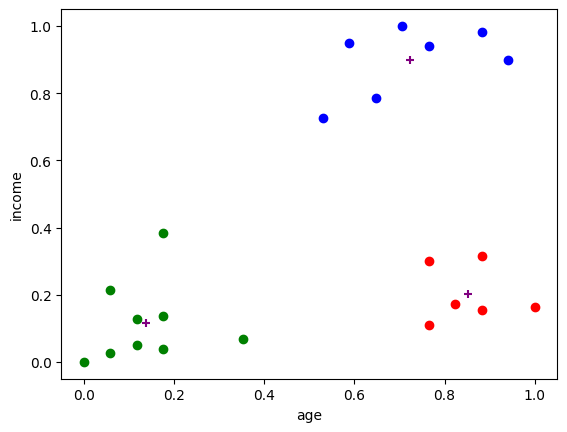

In [77]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
plt.scatter(df0.Age, df0['Income($)'], color = 'green')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='+', label='centroid')
plt.xlabel('age')
plt.ylabel('income')
plt.show()

In [78]:
krng = range(1, 10)
sse = []
for k in krng:
    km = KMeans(n_clusters=k)
    km.fit(df.drop(['Name', 'cluster'], axis='columns'))
    sse.append(km.inertia_)
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.3522219925600284,
 0.2417481801197015,
 0.21090698258651414,
 0.15386320999546688,
 0.12104007625145945]

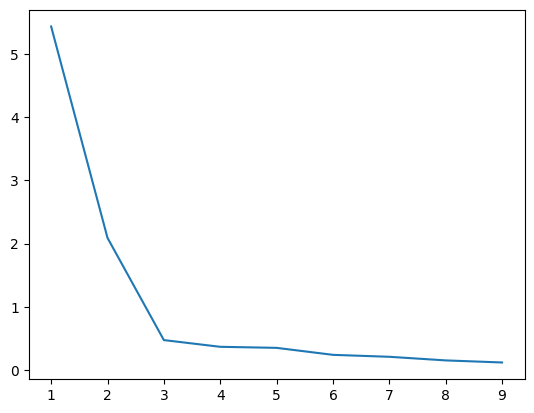

In [79]:
plt.plot(krng, sse)
plt.show()

In [82]:
# Discrete Bayesian Network

In [87]:
model = DiscreteBayesianNetwork([
    ('Study', 'Pass'),
    ('Sleep', 'Pass'),
    ('Pass', 'Happy')
])

cpdStudy = TabularCPD(variable = 'Study', variable_card = 2, values = [[0.3], [0.7]])
cpdSleep = TabularCPD(variable = 'Sleep', variable_card = 2, values = [[0.4], [0.6]])

cpdPass = TabularCPD(
    variable = 'Pass', variable_card = 2,
    values = [
        [0.1, 0.4, 0.5, 0.8],
        [0.9, 0.6, 0.5, 0.2]
    ],
    evidence = ['Study', 'Sleep'],
    evidence_card = [2, 2]
)

cpdHappy = TabularCPD(
    variable = 'Happy', variable_card = 2,
    values = [
        [0.05, 0.7],
        [0.95, 0.3]
    ],
    evidence = ['Pass'],
    evidence_card = [2]
)

model.add_cpds(cpdStudy, cpdSleep, cpdPass, cpdHappy)

assert model.check_model()

infer = VariableElimination(model)

result1 = infer.query(variables=['Study'], evidence={'Happy': 1})
print("P(Study=True | Happy=True):", result1)

result2 = infer.query(variables=['Sleep'], evidence={'Happy': 1})
print("P(Sleep=True | Happy=True):", result2)

P(Study=True | Happy=True): +----------+--------------+
| Study    |   phi(Study) |
+==========+==============+
| Study(0) |       0.2178 |
+----------+--------------+
| Study(1) |       0.7822 |
+----------+--------------+
P(Sleep=True | Happy=True): +----------+--------------+
| Sleep    |   phi(Sleep) |
+==========+==============+
| Sleep(0) |       0.3295 |
+----------+--------------+
| Sleep(1) |       0.6705 |
+----------+--------------+


In [89]:
# Maklov Network

In [90]:
model = MarkovNetwork()
model.add_edges_from([
    ('Study', 'Sleep'),
    ('Study', 'Pass'),
    ('Sleep', 'Pass'),
    ('Pass', 'Happy')
])

phi_study = DiscreteFactor(variables=['Study'], cardinality=[2], values=[0.3, 0.7])

# Factor: P(Sleep)
phi_sleep = DiscreteFactor(variables=['Sleep'], cardinality=[2], values=[0.4, 0.6])

# Factor: P(Pass | Study, Sleep)
phi_pass = DiscreteFactor(
    variables=['Study', 'Sleep', 'Pass'],
    cardinality=[2, 2, 2],
    values=[
        0.1, 0.9, 0.4, 0.6,
        0.5, 0.5, 0.8, 0.2
    ]
)

# Factor: P(Happy | Pass)
phi_happy = DiscreteFactor(
    variables=['Pass', 'Happy'],
    cardinality=[2, 2],
    values=[
        0.05, 0.95,
        0.7, 0.3
    ]
)

# Add factors to the model
model.add_factors(phi_study, phi_sleep, phi_pass, phi_happy)

# Inference
infer = BeliefPropagation(model)

# Query 1: P(Study | Happy=True)
result1 = infer.query(variables=['Study'], evidence={'Happy': 1})
print("P(Study=True | Happy=True):", result1)

# Query 2: P(Sleep | Happy=True)
result2 = infer.query(variables=['Sleep'], evidence={'Happy': 1})
print("P(Sleep=True | Happy=True):", result2)

P(Study=True | Happy=True): +----------+--------------+
| Study    |   phi(Study) |
+==========+==============+
| Study(0) |       0.2178 |
+----------+--------------+
| Study(1) |       0.7822 |
+----------+--------------+
P(Sleep=True | Happy=True): +----------+--------------+
| Sleep    |   phi(Sleep) |
+==========+==============+
| Sleep(0) |       0.3295 |
+----------+--------------+
| Sleep(1) |       0.6705 |
+----------+--------------+
